# Анализ поведения пользователей Яндекс.Дзен

## Часть. Описание и техническое задание


<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">

</font><b>Описание:</b></font><br>

- Проведем анализ пользовательского взаимодействия с карточками статей Яндекс.Дзен.<br>
- Каждую карточку определяют её тема и источник. Примеры тем: «Красота и здоровье», «Россия», «Путешествия».<br>
- Пользователей системы характеризует возрастная категория.<br>
- Есть три способа взаимодействия пользователей с системой:<br>
    - Карточка отображена для пользователя `show`;<br>
    - Пользователь кликнул на карточку `click`;<br>
    - Пользователь просмотрел статью карточки `view`.<br>
    
</font><b>Цель:</b></font><br> 
- Автоматизировать процессы отображения информации о взаимодействии пользователей на платформе Яндекс.Дзен и сделать дашборд.<br>

</font><b>Техническое задание:</b></font><br> 
- Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен;<br>
- Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;
- Кто будет основным пользователем дашборда: менеджеры по анализу контента;
- Состав данных для дашборда:
    - История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
    - Разбивка событий по темам источников;
    - Таблица соответствия тем источников темам карточек;
- По каким параметрам данные должны группироваться:
    - Дата и время;
    - Тема карточки;
    - Тема источника;
    - Возрастная группа;
- Характер данных:
     - История событий по темам карточек — абсолютные величины с разбивкой по минутам;
     - Разбивка событий по темам источников — относительные величины (% событий);
     - Соответствия тем источников темам карточек - абсолютные величины;
- Важность: все графики имеют равную важность;
- Источники данных для дашборда: дата-инженеры обещали подготовить для вас агрегирующую таблицу `dash_visits`. Вот её структура:
    - `record_id` — первичный ключ,
    - `item_topic` — тема карточки,
    - `source_topic` — тема источника,
    - `age_segment` — возрастной сегмент,
    - `dt` — дата и время,
    - `visits` — количество событий.
- Таблица хранится в специально подготовленной для вас базе данных `zen`;
- Частота обновления данных: один раз в сутки, в полночь по UTC;
- Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):<br>

</div>

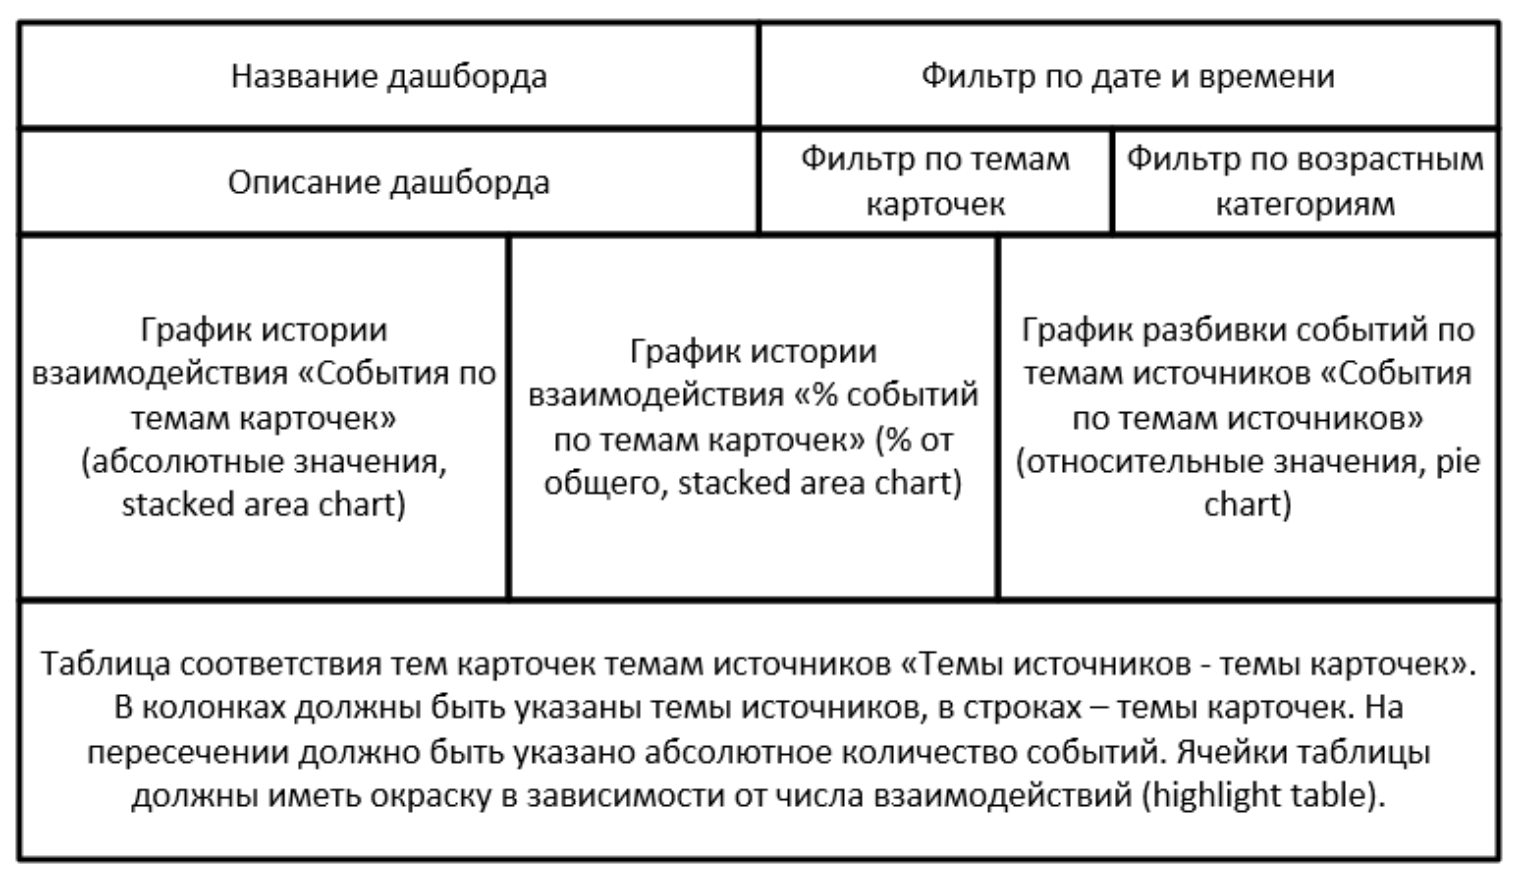

## Часть. Создание дашборда

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# коннектимся к базе и сохраняем данные для работы в Tableau
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

query = ''' SELECT * FROM dash_visits '''

dash_visits = pd.io.sql.read_sql(query, con = engine)

dash_visits.to_csv('dash_visits.csv', index=False)

dash_visits.head(5)

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


<div style="border: solid green 2px; padding: 20px"> 
<b> </b>

[Дашборд на сайте Tableau Public](https://public.tableau.com/app/profile/daria6448/viz/YA_dash_visits_ds/sheet4?publish=yes)
    
[Презентация](https://docs.google.com/presentation/d/1IhscQRgJRc61biA2uxnMtax-nqpOchiMo25_atI1vFc/edit?usp=sharing)
    
</div>